<b>Contining the previous notebook...</b>

Using TensorFlow backend.


dimensions input: 61878 (observations) x 93 (features)
Nbr of classes: 9
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 9)                 846       
_________________________________________________________________
activation_1 (Activation)    (None, 9)                 0         
Total params: 846
Trainable params: 846
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1
61878/61878 [==============================] - 2s 35us/step - loss: 1.9792
Predicted class 5
Predicted probabilities [0.11235484 0.07289425 0.08437053 0.10120966 0.12639445 0.15881954
 0.14052781 0.10988595 0.09354294]
Nbr of samples in test: 144368
1
[0.0938563  0.20213217 0.18350731 0.08050612 0.09798956 0.0814905
 0.08999772 0.07629865 0.0942217 ]


/Users/jandespiegeleer/.pyenv/versions/3.6.5/envs/seminar/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


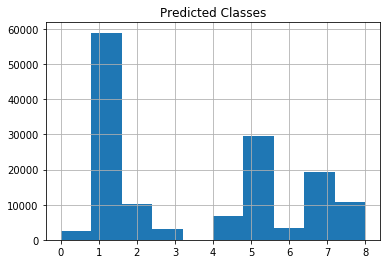

In [1]:
import warnings
warnings.filterwarnings("ignore")
%run ottogroup_initial.ipynb

<h3>Splitting the training data</h3> into training (85%) and test (15%) using the <b>train_test_split</b> method of the sklearn.model_selection module.

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train,
                                                  test_size=0.15, random_state=42)

In [4]:
print('Nbr of samples in training:',X_train.shape[0])
print('Nbr of sample in test:',X_val.shape[0])

Nbr of samples in training: 52596
Nbr of sample in test: 9282


In the fit method of the model we can now pass both training / test data.<br>
The <b>batch size</b> is set to 128. This means that the weights are only changed after processing 128 items in the list.<br>
The <b>epoch</b> is set to 5, which means that the whole data-set passes 5 times through the backpropagation.

In [5]:
model.fit(X_train, Y_train, 
          validation_data = (X_val, Y_val),
          epochs=5,verbose=True,batch_size=128 ) 

Train on 52596 samples, validate on 9282 samples
Epoch 1/5
52596/52596 [==============================] - 1s 12us/step - loss: 1.8651 - val_loss: 1.8501
Epoch 2/5
52596/52596 [==============================] - 1s 11us/step - loss: 1.8464 - val_loss: 1.8331
Epoch 3/5
52596/52596 [==============================] - 1s 11us/step - loss: 1.8308 - val_loss: 1.8186
Epoch 4/5
52596/52596 [==============================] - 1s 11us/step - loss: 1.8172 - val_loss: 1.8060
Epoch 5/5
52596/52596 [==============================] - 1s 11us/step - loss: 1.8053 - val_loss: 1.7947


<h4>Adding Callback</h4>
Adding callback function 

In [6]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

<b>Callback:Early Stopping</b><br>
This is call back function that is such that the model stops improving as soon
as two consecutive times, the loss function (=val loss) has not improved or stayed the same. Two parameters are defined with the model:
<ul>
<li>patience: number of epochs with no improvement after which training will be stopped.
<li>monitor:monitor: quantity to be monitored.
    </ul>

In [7]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

<h4>Callback: Storing intermediate output</h4>
The intermediate networks (with temp weights) are stored on the filepath (fBestModel) in a hdf5 format
it is then afterwards possible to load models from this

In [8]:
fBestModel = './models/weights.{epoch:02d}-{val_loss:.2f}.hdf5' 
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

The callback functions are added to the fit method

In [9]:
model.fit(X_train, Y_train, validation_data = (X_val, Y_val), 
          epochs=5, 
          batch_size=128, verbose=True, 
          callbacks=[best_model, early_stop]) 

Train on 52596 samples, validate on 9282 samples
Epoch 1/5
52596/52596 [==============================] - 1s 12us/step - loss: 1.7947 - val_loss: 1.7846
Epoch 2/5
52596/52596 [==============================] - 1s 11us/step - loss: 1.7850 - val_loss: 1.7754
Epoch 3/5
52596/52596 [==============================] - 1s 11us/step - loss: 1.7762 - val_loss: 1.7670
Epoch 4/5
52596/52596 [==============================] - 1s 11us/step - loss: 1.7681 - val_loss: 1.7592
Epoch 5/5
52596/52596 [==============================] - 1s 11us/step - loss: 1.7606 - val_loss: 1.7520


<h3>Evolution of the loss </h3><br>
The evoluation of the history of the network can be plotted (after defining the appropriate plotfunction)

In [10]:

def plot_history(network_history):
    plt.figure(figsize=(8,8))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])


Since we are running 50 Epochs with batch-sizes of 128, we are going to supress the output of the model on the screen.
But we will make use of the plot function afterwards.

In [11]:
history = model.fit(X_train, Y_train, 
                    validation_data = (X_val, Y_val), 
                    epochs=50,batch_size=128,
                    verbose=False) 

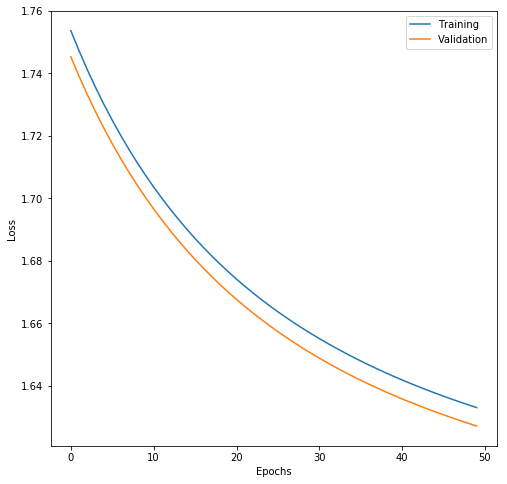

In [12]:
plot_history(history)

<h3>Adding a different initializer to the model</h3>
<br>
We are in full control over the construction of the network. The initialisation of the weights (setting them to zero in this case) is an example of this.

In [13]:
from keras import initializers

model_zero = Sequential()
model_zero.add(Dense(nb_classes, input_shape=(dims[1],), 
                     kernel_initializer=initializers.zeros(), 
                     activation='sigmoid'))
model_zero.add(Activation('softmax'))
model_zero.compile(optimizer='sgd', loss='categorical_crossentropy')

In [14]:
model_zero.fit(X_train, Y_train, 
          validation_data = (X_val, Y_val),
          epochs=5,verbose=True,batch_size=128 ) 

Train on 52596 samples, validate on 9282 samples
Epoch 1/5
52596/52596 [==============================] - 1s 13us/step - loss: 2.0800 - val_loss: 1.9989
Epoch 2/5
52596/52596 [==============================] - 1s 12us/step - loss: 1.9617 - val_loss: 1.9248
Epoch 3/5
52596/52596 [==============================] - 1s 14us/step - loss: 1.9068 - val_loss: 1.8830
Epoch 4/5
52596/52596 [==============================] - 1s 12us/step - loss: 1.8725 - val_loss: 1.8544
Epoch 5/5
52596/52596 [==============================] - 1s 12us/step - loss: 1.8478 - val_loss: 1.8328


<h3>Adding a dropout layer</h3>
In this example we set a drop layer of 20% just before the first hidden layer. This means that in each feedforward / backpropogation run 20% of the 93 nodes are going to be ignored. 

In [15]:
from keras.layers import Dropout
model_drop = Sequential()
model_drop.add(Dropout(0.2, input_shape=(dims[1],)))
model_drop.add(Dense(nb_classes, activation='sigmoid'))
model_drop.add(Activation('softmax'))
model_drop.compile(optimizer='sgd', loss='categorical_crossentropy')

In [16]:
model_drop.fit(X_train, Y_train, 
          validation_data = (X_val, Y_val),
          epochs=5,verbose=True,batch_size=128 ) 

Train on 52596 samples, validate on 9282 samples
Epoch 1/5
52596/52596 [==============================] - 1s 15us/step - loss: 2.1244 - val_loss: 2.0518
Epoch 2/5
52596/52596 [==============================] - 1s 12us/step - loss: 2.0230 - val_loss: 1.9735
Epoch 3/5
52596/52596 [==============================] - 1s 12us/step - loss: 1.9649 - val_loss: 1.9260
Epoch 4/5
52596/52596 [==============================] - 1s 12us/step - loss: 1.9280 - val_loss: 1.8934
Epoch 5/5
52596/52596 [==============================] - 1s 12us/step - loss: 1.9002 - val_loss: 1.8689
